<a href="https://colab.research.google.com/github/kretchmar/CS339_2023/blob/main/Eigenfaces_PCA_toolkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EigenFaces Notebook

Matt Kretchmar <p>
January 2023 <p>

In this notebook we apply the classic PCA algorithm to facial images.   The goal is to map the images into a lower dimensional space where learning (ie classification) can be much easier.  We follow the example and mathematics laid out in the class textbook *Geometric Data Analysis* by Mike Kirby.  

The PCA algorithm computes the eigen values of the covariance matrix and uses these to form a new basis for casting images.  We can map the data down into a 2D projection so that we can visualize the separation between images of two different people.  

### Methodology
In this notebook we do the computations in two different ways.  We first use the SVD decomposition provided by the linalg toolkit.  Then we repeat the experiment using the built-in PCA.  


In [ ]:
# Import Statements
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from PIL import Image
from scipy import linalg as la


In [ ]:
# You will need to obtain the data2D.csv file and then put it in your google drive.
# Be sure to change the path after "My Drive" to your own file structure in your own google drive.

from google.colab import drive
drive.mount('/content/gdrive')

#data = pd.read_csv('/content/gdrive/My Drive/cs339/Notebooks/data2D.csv',sep='\t',index_col=0)

# Read 20 images of data input and store them in a numpy array where each row is an image
# and each column is an attribute

data = np.zeros((20,10304))

path = '/content/gdrive/My Drive/cs339/Notebooks/Images1/'

# read 10 images of Matt Neal
for i in range(10):
    filename = 'MattN{0:d}.jpg'.format(i+1)
    print('loading: ',filename)
    im = Image.open(path+filename)
    a = np.asarray(im)
    a = a.reshape(112*92)
    data[i,:] = a.astype(float)
    
# read 10 images of Matt Kretchmar
for i in range(10):
    filename = 'MattK{0:d}.jpg'.format(i+1)
    print('loading: ',filename)
    im = Image.open(path+filename)
    a = np.asarray(im)
    a = a.reshape(112*92)
    data[i+10,:] = a.astype(float)
    


# disconnect the drive
drive.flush_and_unmount()



Mounted at /content/gdrive
loading:  MattN1.jpg
loading:  MattN2.jpg
loading:  MattN3.jpg
loading:  MattN4.jpg
loading:  MattN5.jpg
loading:  MattN6.jpg
loading:  MattN7.jpg
loading:  MattN8.jpg
loading:  MattN9.jpg
loading:  MattN10.jpg
loading:  MattK1.jpg
loading:  MattK2.jpg
loading:  MattK3.jpg
loading:  MattK4.jpg
loading:  MattK5.jpg
loading:  MattK6.jpg
loading:  MattK7.jpg
loading:  MattK8.jpg
loading:  MattK9.jpg
loading:  MattK10.jpg


## Image Data
In this example we use 20 black and white, low resolution images of two different people.   

Person | # Images | Dimension 
-------|----------|---------------
Matt Neal | 10 | 92 x 112
Matt Kretchmar | 10 | 92 x 112

The images are recast as 1D vectors of length 10304 (92x112) and stored in a numpy vector.   



In [ ]:
def showImage (im):
  im = im.reshape((112,92))
  plt.imshow(im,cmap='gray')

Image of Matt Neal (#0)
Image of Matt Kretchmar (#10)


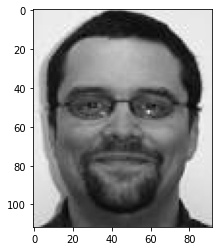

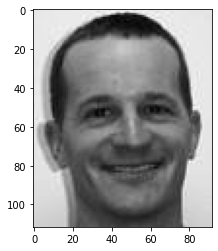

In [ ]:
print("Image of Matt Neal (#0)")
plt.figure(0)
showImage(data[0,:])

print("Image of Matt Kretchmar (#10)")
plt.figure(1)
showImage(data[10,:])


## PCA Computations

A problem like this has data that is characterized by $n$ samples each of which likes in $d$ dimensions.   We can think of the data $X$ as a $n \times d$ array where each row is one image of size $d$.  For this problem we have $n=20$ images each of which lies in $d = 10304$ dimension space.  

$$
X = \left|  
\begin{array}
<--- sample 0 ---> \\

\end{array}
\right|
$$

Typically we either have that $n >> d$ or that $d >> n$.   Deciding which case we have is important for the functionality of the algorithm.   We want to know the dimension of the sub-hyperplane in which the data lies.  This is the smaller of $d$ or $n$.  This dimension of the hyperplane is exactly the number of eigenvalues and eigenvectors we will get from the problem.  

#### n > d
In the case where $n$ > $d$, we will compute the eigenvalues from the regular covariance matrix $C$:   

$$
C = X^T \cdot X
$$

This is a $d \times d$ matrix which will yield $d$ eigenvectors/values.  

#### d > n
In this case we have fewer samples but they are each of big dimension.  That is the situation we have with the image dataset which has only $n=20$ images but each of them lie in $d=10304$ dimensional space.  In this case it doesn't make sense to compute the covariance matrix $C$ of dimension $d \times d$ because it will be non-singular.  If we try to compute the eigenvalues the software will complain because the matrix is so huge.  Plus, it will only yield $d$ eigenvectors/values anyway.   

So instead we compute the sample covariance matrix $C'$ and then compute the eigenvectors from this matrix:

$$
C = X \cdot X^T
$$

Then we re-cast the eigenvectors from the sample covariance matrix back into the eigenvectors of the covariance matrix.  




In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit(data)



In [ ]:
print(data_2d)
print(pca.components_.T[:,0])
print(pca.components_.T[:,0].shape)

PCA(n_components=2)
[ 0.00197816  0.00197816  0.00197816 ... -0.03455153 -0.03051996
 -0.02837015]
(10304,)


In [ ]:
#plot the first two coefficients of alpha for each point
plt.scatter(
    alpha[:10,0],alpha[:10,1])
plt.scatter(alpha[10:,0],alpha[10:,1])
plt.xlabel('alpha 0')
plt.ylabel('alpha 1')
plt.legend(['Dr. Neal','Dr. Kretchmar'])
plt.title('First Two Coefficients of alpha')
plt.show()

EigenValues: [5.35230628e+07+0.j 2.31735710e+07+0.j 2.12153378e+07+0.j
 1.33273007e+07+0.j 1.10366236e+07+0.j 9.05073530e+06+0.j
 7.05843899e+06+0.j 5.25844818e+06+0.j 6.38018244e-09+0.j
 4.10892319e+06+0.j 3.87746791e+06+0.j 3.24940520e+06+0.j
 7.27126713e+05+0.j 2.77449023e+06+0.j 2.42561572e+06+0.j
 2.09074249e+06+0.j 1.79825071e+06+0.j 1.48132489e+06+0.j
 1.12662533e+06+0.j 1.17517645e+06+0.j]
Shape of eigenvectors:  (20, 20)
[ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 16 17 19 18 12  8]
[5.35230628e+07+0.j 2.31735710e+07+0.j 2.12153378e+07+0.j
 1.33273007e+07+0.j 1.10366236e+07+0.j 9.05073530e+06+0.j
 7.05843899e+06+0.j 5.25844818e+06+0.j 4.10892319e+06+0.j
 3.87746791e+06+0.j 3.24940520e+06+0.j 2.77449023e+06+0.j
 2.42561572e+06+0.j 2.09074249e+06+0.j 1.79825071e+06+0.j
 1.48132489e+06+0.j 1.17517645e+06+0.j 1.12662533e+06+0.j
 7.27126713e+05+0.j 6.38018244e-09+0.j]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


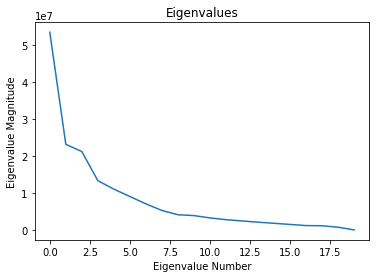

complex128
Percent/Accum Percent for Eigval [ 0]:  0.32   0.32
Percent/Accum Percent for Eigval [ 1]:  0.14   0.46
Percent/Accum Percent for Eigval [ 2]:  0.13   0.58
Percent/Accum Percent for Eigval [ 3]:  0.08   0.66
Percent/Accum Percent for Eigval [ 4]:  0.07   0.73
Percent/Accum Percent for Eigval [ 5]:  0.05   0.78
Percent/Accum Percent for Eigval [ 6]:  0.04   0.82
Percent/Accum Percent for Eigval [ 7]:  0.03   0.85
Percent/Accum Percent for Eigval [ 8]:  0.02   0.88
Percent/Accum Percent for Eigval [ 9]:  0.02   0.90
Percent/Accum Percent for Eigval [10]:  0.02   0.92
Percent/Accum Percent for Eigval [11]:  0.02   0.94
Percent/Accum Percent for Eigval [12]:  0.01   0.95
Percent/Accum Percent for Eigval [13]:  0.01   0.96
Percent/Accum Percent for Eigval [14]:  0.01   0.97
Percent/Accum Percent for Eigval [15]:  0.01   0.98
Percent/Accum Percent for Eigval [16]:  0.01   0.99
Percent/Accum Percent for Eigval [17]:  0.01   1.00
Percent/Accum Percent for Eigval [18]:  0.00   1.00
P

In [ ]:
# computes the eigenvectors as COLUMN vectors
evals,evecs = la.eig(C)
print('EigenValues:',evals)
print('Shape of eigenvectors: ',evecs.shape)


# sort indices of eigenvectors by reverse order of eigenvalues (biggest down to smallest)
indices = np.argsort(evals)
indices = indices[::-1]
print(indices)
# re-order the eigenvalues and eigenvalues
evecs = evecs[:,indices]
evals = evals[indices]

print(evals)

plt.figure()
plt.plot(evals)
plt.title('Eigenvalues')
plt.xlabel('Eigenvalue Number')
plt.ylabel('Eigenvalue Magnitude')
plt.show()

print(evals[0].dtype)
total = 0
for i in range(20):
  total += np.absolute(evals[i])

accum = 0
for i in range(20):
  percent = np.absolute(evals[i]) / total
  accum += percent
  print("Percent/Accum Percent for Eigval [{0:2d}]: {1:5.2f}  {2:5.2f}".format(i,percent,accum))


## Eigenvalue Interpretation
The eigenvalues give us an idea of how much variance is captured in the dataset in the direction of each eigenvector.  We can see from the plot above, that the first couple of eigenvalue are much larger  than the remaining eigenvalues.  That tells us that much of the total variance of the data is explained in just one dimension -- the dimension spanned by the first eigenvector.   In fact, 32% of the total variance is just in the first direction!  The first five eigenvectors account for nearly 80% of the total variance.  



### Recasting
Because we computed eigenvalues/vectors on the *sample* covariance matrix instead of the native covariance matrix, we must map the eigenvectors back into "native space".  

In [ ]:
# Project data back into full dimensionality to find the "native eigenvectors" as row vectors now
V = np.dot(evecs.transpose(),data)
print(V.shape)

(20, 10304)


## Eigenfaces
The eigenvectors are now "points" in "face space".  They represent directions where variance is found in the data.  We can actually display them as faces -- we call these eigenvectors "eigenfaces".  We show the first couple of them.


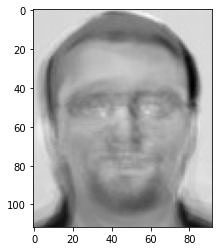

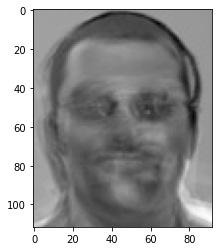

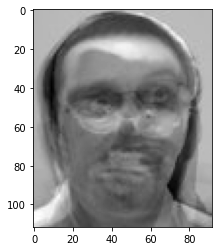

In [ ]:
plt.figure()
showImage(V[0]+mean_image)
plt.figure()
showImage(V[1]+mean_image)
plt.figure()
showImage(V[2]+mean_image)


We can now remap the images into a different basis.  The new vector space is 20 dimension spanned by the 20 eigenvectors.  

$$
V_0, V_1, V_2, ..., V_{19}
$$

Then any "point" (image) can be represented by a set of coefficients in this new space:

$$
X_0 = \alpha^0_0 V_0 + \alpha^0_1 V_1 + ... + \alpha^0_{19} V_{19}
$$

where $\alpha^j_i$ is the $i$th row and $j$th column of the coefficient matrix $\alpha$. 

This will give us a perfect reconstruction of the image in the original standard normal vector space.  




In [ ]:
# We now compute the coefficients for each original image as coordinates that span the eigenspace.  
alpha = np.dot(data,np.linalg.pinv(V))
print(alpha.shape)
# each row is a set of coordinates for an image


(20, 20)


## Reconstruction Example
 Let us fully reconstruct the first face


(20,)
(10304,)


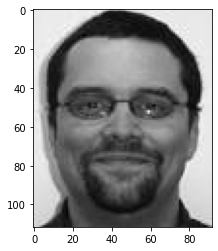

In [ ]:
print(alpha[0,:].shape)
print(V[0,:].shape)
face0_20 = np.dot(alpha[0,:].transpose(),V)
showImage(face0_20+mean_image)



## Partial Reconstruction
The above is the full, 20-term reconstruction of the first face.   It is an exact reproduction of the first image.  There will be 0 error between this image and the original.  

But we can also opt to perform a partial reconstruction.  We can use the first $k < 20$ eigenvectors to do a partial reconstruction.  This will recreate an image that is approximate to the original, but not exact.   Just eye-balling the image, humans might not be able to tell the difference.   The following cells perform a partial reconstruction and also report an error difference.  

In [ ]:
def imageError (im1, im2):
  return ((im1-im2)**2).mean(axis=0)


15 Term Reconstruction
Error:  17.62625717773652


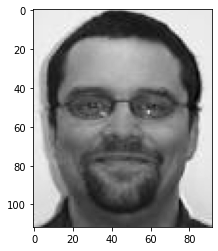

In [ ]:
# 15 term reconstruction
k = 15
face0_15 = np.dot(alpha[0,:k].transpose(),V[:k,:])
showImage(face0_15+mean_image)
print("{0:d} Term Reconstruction".format(k))
print("Error: ",imageError(face0_15,data[0,:]))

The 10 term reconstruction below looks a little fuzzy now, but we can still tell who is in the image.  

10 Term Reconstruction
Error:  122.72189059204722


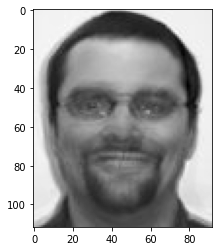

In [ ]:
# 10 term reconstruction
k = 10
face0_10 = np.dot(alpha[0,:k].transpose(),V[:k,:])
showImage(face0_10+mean_image)
print("{0:d} Term Reconstruction".format(k))
print("Error: ",imageError(face0_10,data[0,:]))

5 Term Reconstruction
Error:  167.0928552098487


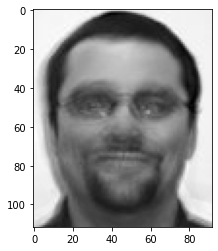

In [ ]:
# 5 term reconstruction
k = 5
face0_5 = np.dot(alpha[0,:k].transpose(),V[:k,:])
showImage(face0_5+mean_image)
print("{0:d} Term Reconstruction".format(k))
print("Error: ",imageError(face0_5,data[0,:]))

3 Term Reconstruction
Error:  197.73225605885756


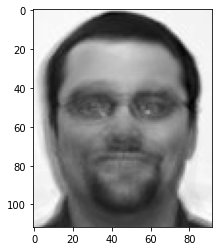

In [ ]:
# 3 term reconstruction
k = 3
face0_3 = np.dot(alpha[0,:k].transpose(),V[:k,:])
showImage(face0_3+mean_image)
print("{0:d} Term Reconstruction".format(k))
print("Error: ",imageError(face0_3,data[0,:]))

## 2D Projection
Now we have the big payout.  We can project the full dataset into a two-dimensional space so that we can visualize the patterns in the data.  We use the new basis and select the first two coefficients of $\alpha$ since these are the most important (on the basis of variance).  

This kind of projection is the main purpose of this algorithm.  We started with $n=20$ samples in $d=10304$ dimensional space.  It was utterly hopeless to visualize the patterns in the dataset.  If we wanted to feed the data to a neural network, the ANN would require 10304 inputs, and a huge number of hidden units as well.  We would have thousands of weights and require thousands of training samples to train the network properly.  

By projecting the data into 2D space, we now have a very easy way to visualize the data.  We can clearly see a cluster of points for "Matt Neal" images and another cluster of points for "Matt Kretchmar" images.  Doing classification in this 2D space is trivial.  In fact, our "classifier" can simply look at $\alpha_0$ and decide if it is positive (Matt Neal) or negative (Matt Kretchmar).  What a trivial classifier!  



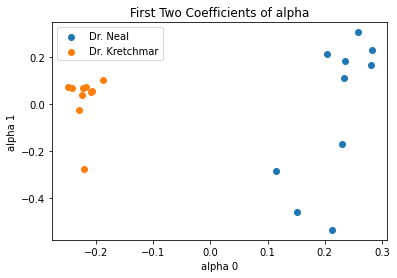

In [ ]:
#plot the first two coefficients of alpha for each point
plt.scatter(alpha[:10,0],alpha[:10,1])
plt.scatter(alpha[10:,0],alpha[10:,1])
plt.xlabel('alpha 0')
plt.ylabel('alpha 1')
plt.legend(['Dr. Neal','Dr. Kretchmar'])
plt.title('First Two Coefficients of alpha')
plt.show()

## Summary

Keep in mind that this space is built to represent these 20 images.  We can find 20 coefficients for any of these images that exactly reproduces these images.  If we have other, very similar images, then it is very likely we can find 20 alpha coefficients that very nearly represent the new image.  It will not be an exact facsimile; there will be some error.  But it will be "good enough" for classification, but probably not for image fidelity.  

If we have a new image that is different from this set, say an image of Beyonce or worse, an image of a horse, then it will not be well represented by this vector space.  This vector space is tuned specifically to images of Matt Neal and Matt Kretchmar.

We can also use this algorithm for data compression.   An original image is 10304 bytes.   This is not huge by modern standards, but still reasonably large.  We can instead compress the image to 20 bytes and then transmit the 20 bytes across a slow/expensive channel.   At the receiving end, we use the eigenvectors to "recreate" the full image from the 20 bytes (alpha coefficients).   This same technique could be applied to modern images of megapixels just as easily.  It doesn't change the fact that we still only have 20 images -- so alpha remains the same even if $d \approx 10^6$.  